In [ ]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import plotly.express as px
import requests 

In [ ]:
# Pandas - show all columns
pd.set_option('display.max_columns', None)

<center>
    <img src="https://raw.githubusercontent.com/errikadd/Customer_Behavior_Sales_DataAnalysis/main/images/title.png" width="100%" align='center' alt="data analysis image">
</center>

<h1 align='center'>Customer Behavior and Sales<br>Exploratory Data Analysis (EDA)</h1>

<p align='center'>The goal of this analysis is to analyze the dataset, summarize its main characteristics using data visualization methods, and find useful patterns and insights.</p>

<br>
<h3>About the Dataset</h3>

Dataset: <a href="https://www.kaggle.com/datasets/timcii/clothing-store-sales-data">"Customer Behavior and Purchase Dataset"</a> by Fehim Salis from <a href="https://www.kaggle.com/">Kaggle.com</a><br>
License: <a href="https://creativecommons.org/licenses/by-sa/4.0/">"CC BY-SA 4.0"</a><br>
The "dataset contains detailed information on 102,771 purchase transactions from an e-commerce platform during the period of January 2022 to December 2024. The dataset covers various dimensions including customer demographics, purchasing behaviors, product preferences, payment methods, and customer loyalty". A detailed description of this dataset can be obtained <a href="https://www.kaggle.com/datasets/timcii/clothing-store-sales-data">here</a>.<br>
Changes made to the dataset before EDA: the delimiter was changed to comma instead of semicolon.

GeoJSON file: <a href="https://datahub.io/core/geo-admin1-us">"Natural Earth Admin1 Polygons as GeoJSON"</a> from <a href="https://datahub.io/">datahub.io</a><br>
License: <a href="https://opendatacommons.org/licenses/pddl/">"Open Data Commons Public Domain Dedication and License v1.0"</a><br>
"All data is licensed under the <a href="https://opendatacommons.org/licenses/pddl/1-0/">Open Data Commons Public Domain Dedication and License</a>.
The original data from <a href="https://www.naturalearthdata.com/">Natural Earth</a> is public domain. While no credit is formally required a link back or credit to <a href="https://www.naturalearthdata.com/">Natural Earth</a>, <a href="https://github.com/lexman">Lexman</a> and the <a href="https://okfn.org/en/">Open Knowledge Foundation</a> is much appreciated."

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Do not use scientific notation for numbers
pd.set_option('display.float_format', '{:,.2f}'.format)

<br>
<br>
<br>
<h1 align='center'>Data Wrangling</h1>

In [ ]:
# Loading data to dataframe
filepath = "https://raw.githubusercontent.com/errikadd/Customer_Behavior_Sales_DataAnalysis/refs/heads/main/data/EcommData_CSV.csv"
df = pd.read_csv(filepath, header=0)
df.head()

Customer ID  Age Gender Item Purchased     Category Purchase Amount (USD)  \
0            1   55   Male           Belt  Accessories                  46,9   
1            1   55   Male        Sweater     Clothing                  48,1   
2            1   55   Male        Sweater     Clothing                  62,1   
3            1   55   Male           Belt  Accessories                  25,0   
4            1   55   Male        Sweater     Clothing                  89,8   

   Location Size      Color  Season Review Rating Subscription Status  \
0  Kentucky    L       Gray  Winter             5                 Yes   
1  Kentucky    L      Green  Spring             1                 Yes   
2  Kentucky    L      Green  Spring             5                 Yes   
3  Kentucky    L  Turquoise  Summer             5                 Yes   
4  Kentucky    L       Blue  Summer             5                 Yes   

    Shipping Type  Promo Code Used  Previous Purchases Payment Method  \
0        Standard                0                  14    Credit Card   
1   Free Shipping                0                  14    Credit Card   
2    Next Day Air                0                  14     Debit Card   
3   Free Shipping                0                  14    Credit Card   
4  2-Day Shipping                0                  14     Google Pay   

  Purchase Date  WeekdayNum   Weekday  Weekend  Churn  
0     7.01.2022           5    Friday        0      1  
1    19.03.2022           6  Saturday        1      1  
2     3.05.2022           2   Tuesday        0      1  
3     7.05.2022           6  Saturday        1      1  
4    10.06.2022           5    Friday        0      1

In [ ]:
# Finding the size of the dataset
df.shape

(102771, 21)

In [ ]:
# Printing the summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102771 entries, 0 to 102770
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Customer ID            102771 non-null  int64 
 1   Age                    102771 non-null  int64 
 2   Gender                 102771 non-null  object
 3   Item Purchased         102771 non-null  object
 4   Category               102771 non-null  object
 5   Purchase Amount (USD)  102771 non-null  object
 6   Location               102771 non-null  object
 7   Size                   102771 non-null  object
 8   Color                  102771 non-null  object
 9   Season                 102771 non-null  object
 10  Review Rating          102771 non-null  object
 11  Subscription Status    102771 non-null  object
 12  Shipping Type          102771 non-null  object
 13  Promo Code Used        102771 non-null  int64 
 14  Previous Purchases     102771 non-null  int64 
 15  

In [ ]:
# Printing the statistical description of the dataset, including that of 'object' data types
df.describe(include='all')

Customer ID        Age  Gender Item Purchased  Category  \
count    102,771.00 102,771.00  102771         102771    102771   
unique          NaN        NaN       2              8         4   
top             NaN        NaN    Male        Sweater  Clothing   
freq            NaN        NaN   70827          43661     69504   
mean       1,926.33      44.41     NaN            NaN       NaN   
std        1,128.99      15.19     NaN            NaN       NaN   
min            1.00      18.00     NaN            NaN       NaN   
25%          945.00      31.00     NaN            NaN       NaN   
50%        1,921.00      45.00     NaN            NaN       NaN   
75%        2,888.00      57.00     NaN            NaN       NaN   
max        3,900.00      70.00     NaN            NaN       NaN   

       Purchase Amount (USD)  Location    Size   Color  Season Review Rating  \
count                 102771    102771  102771  102771  102771        102771   
unique                   861        50       4      18       4             9   
top                    100,0  Illinois       M    Blue  Summer             5   
freq                    3657      2539   46165   10335   29321         49347   
mean                     NaN       NaN     NaN     NaN     NaN           NaN   
std                      NaN       NaN     NaN     NaN     NaN           NaN   
min                      NaN       NaN     NaN     NaN     NaN           NaN   
25%                      NaN       NaN     NaN     NaN     NaN           NaN   
50%                      NaN       NaN     NaN     NaN     NaN           NaN   
75%                      NaN       NaN     NaN     NaN     NaN           NaN   
max                      NaN       NaN     NaN     NaN     NaN           NaN   

       Subscription Status Shipping Type  Promo Code Used  Previous Purchases  \
count               102771        102771       102,771.00          102,771.00   
unique                   2             5              NaN                 NaN   
top                     No      Standard              NaN                 NaN   
freq                 74251         43032              NaN                 NaN   
mean                   NaN           NaN             0.13               33.27   
std                    NaN           NaN             0.34               12.10   
min                    NaN           NaN             0.00                1.00   
25%                    NaN           NaN             0.00               25.00   
50%                    NaN           NaN             0.00               35.00   
75%                    NaN           NaN             0.00               44.00   
max                    NaN           NaN             1.00               50.00   

       Payment Method Purchase Date  WeekdayNum   Weekday    Weekend  \
count          102771        102771  102,771.00    102771 102,771.00   
unique              8          1096         NaN         7        NaN   
top       Credit Card     4.07.2024         NaN  Saturday        NaN   
freq            37035          1032         NaN     22249        NaN   
mean              NaN           NaN        4.57       NaN       0.38   
std               NaN           NaN        1.86       NaN       0.49   
min               NaN           NaN        1.00       NaN       0.00   
25%               NaN           NaN        3.00       NaN       0.00   
50%               NaN           NaN        5.00       NaN       0.00   
75%               NaN           NaN        6.00       NaN       1.00   
max               NaN           NaN        7.00       NaN       1.00   

            Churn  
count  102,771.00  
unique        NaN  
top           NaN  
freq          NaN  
mean         0.07  
std          0.26  
min          0.00  
25%          0.00  
50%          0.00  
75%          0.00  
max          1.00

In [ ]:
# Testing for empty values (NULL values)
df.isnull().sum()

Customer ID              0
Age                      0
Gender                   0
Item Purchased           0
Category                 0
Purchase Amount (USD)    0
Location                 0
Size                     0
Color                    0
Season                   0
Review Rating            0
Subscription Status      0
Shipping Type            0
Promo Code Used          0
Previous Purchases       0
Payment Method           0
Purchase Date            0
WeekdayNum               0
Weekday                  0
Weekend                  0
Churn                    0
dtype: int64

In [ ]:
# Checking for duplicates
print("Rows with duplicate values: ", df.duplicated().sum())
df[df.duplicated()]

Rows with duplicate values:  0


Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Promo Code Used, Previous Purchases, Payment Method, Purchase Date, WeekdayNum, Weekday, Weekend, Churn]
Index: []

In [ ]:
# Checking data type of each column
df.dtypes

Customer ID               int64
Age                       int64
Gender                   object
Item Purchased           object
Category                 object
Purchase Amount (USD)    object
Location                 object
Size                     object
Color                    object
Season                   object
Review Rating            object
Subscription Status      object
Shipping Type            object
Promo Code Used           int64
Previous Purchases        int64
Payment Method           object
Purchase Date            object
WeekdayNum                int64
Weekday                  object
Weekend                   int64
Churn                     int64
dtype: object

In [ ]:
# Converting object column to floats
df['Purchase Amount (USD)'] = (
    df['Purchase Amount (USD)'].astype(str).str.replace(',', '.', regex=False).astype(float)
    )

In [ ]:
# Converting object column to floats
df['Review Rating'] = (
    df['Review Rating'].astype(str).str.replace(',', '.', regex=False).astype(float)
    )

In [ ]:
# Replacing values ('Male': 0, 'Female': 1) and converting object column to integers
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1}).astype(int)
df['Gender'].value_counts()

Gender
0    70827
1    31944
Name: count, dtype: int64

In [ ]:
# Replacing values ('No': 0, 'Yes': 1) and converting object column to integers
df['Subscription Status'] = df['Subscription Status'].replace({'No': 0, 'Yes': 1}).astype(int)
df['Subscription Status'].value_counts()

Subscription Status
0    74251
1    28520
Name: count, dtype: int64

In [ ]:
# Converting object column to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d.%m.%Y')

In [ ]:
df['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [ ]:
# Adding Latitude and Longitude columns
state_coords = {
    'Alabama': (32.806671, -86.791130),
    'Alaska': (61.370716, -152.404419),
    'Arizona': (33.729759, -111.431221),
    'Arkansas': (34.969704, -92.373123),
    'California': (36.116203, -119.681564),
    'Colorado': (39.059811, -105.311104),
    'Connecticut': (41.597782, -72.755371),
    'Delaware': (39.318523, -75.507141),
    'Florida': (27.766279, -81.686783),
    'Georgia': (33.040619, -83.643074),
    'Hawaii': (21.094318, -157.498337),
    'Idaho': (44.240459, -114.478828),
    'Illinois': (40.349457, -88.986137),
    'Indiana': (39.849426, -86.258278),
    'Iowa': (42.011539, -93.210526),
    'Kansas': (38.526600, -96.726486),
    'Kentucky': (37.668140, -84.670067),
    'Louisiana': (31.169546, -91.867805),
    'Maine': (44.693947, -69.381927),
    'Maryland': (39.063946, -76.802101),
    'Massachusetts': (42.230171, -71.530106),
    'Michigan': (43.326618, -84.536095),
    'Minnesota': (45.694454, -93.900192),
    'Mississippi': (32.741646, -89.678696),
    'Missouri': (38.456085, -92.288368),
    'Montana': (46.921925, -110.454353),
    'Nebraska': (41.125370, -98.268082),
    'Nevada': (38.313515, -117.055374),
    'New Hampshire': (43.452492, -71.563896),
    'New Jersey': (40.298904, -74.521011),
    'New Mexico': (34.840515, -106.248482),
    'New York': (42.165726, -74.948051),
    'North Carolina': (35.630066, -79.806419),
    'North Dakota': (47.528912, -99.784012),
    'Ohio': (40.388783, -82.764915),
    'Oklahoma': (35.565342, -96.928917),
    'Oregon': (44.572021, -122.070938),
    'Pennsylvania': (40.590752, -77.209755),
    'Rhode Island': (41.680893, -71.511780),
    'South Carolina': (33.856892, -80.945007),
    'South Dakota': (44.299782, -99.438828),
    'Tennessee': (35.747845, -86.692345),
    'Texas': (31.054487, -97.563461),
    'Utah': (40.150032, -111.862434),
    'Vermont': (44.045876, -72.710686),
    'Virginia': (37.769337, -78.169968),
    'Washington': (47.400902, -121.490494),
    'West Virginia': (38.491226, -80.954456),
    'Wisconsin': (44.268543, -89.616508),
    'Wyoming': (42.755966, -107.302490)
}

df['Latitude'] = df['Location'].map(lambda x: state_coords.get(x, (None, None))[0])
df['Longitude'] = df['Location'].map(lambda x: state_coords.get(x, (None, None))[1])

In [ ]:
# Extracting the year and month components from the Purchase Date column
df['Month'] = df['Purchase Date'].dt.month
df['Year'] = df['Purchase Date'].dt.year
df.drop(['Purchase Date'],axis=1,inplace=True)

In [ ]:
# Grouping payments into 2 categories
df['Payment Category'] = np.where(
    df['Payment Method'].str.lower() == 'cash',  
    'Cash',                                     
    'Electronic'                                
)

In [ ]:
# Binning the column Age
print(df['Age'].min())
print(df['Age'].max())

# Defining bins and labels
bins = [18, 25, 35, 45, 55, 65, 71]  
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

df['Age_Binned'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

18
70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102771 entries, 0 to 102770
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Customer ID            102771 non-null  int64   
 1   Age                    102771 non-null  int64   
 2   Gender                 102771 non-null  int64   
 3   Item Purchased         102771 non-null  object  
 4   Category               102771 non-null  object  
 5   Purchase Amount (USD)  102771 non-null  float64 
 6   Location               102771 non-null  object  
 7   Size                   102771 non-null  object  
 8   Color                  102771 non-null  object  
 9   Season                 102771 non-null  object  
 10  Review Rating          102771 non-null  float64 
 11  Subscription Status    102771 non-null  int64   
 12  Shipping Type          102771 non-null  object  
 13  Promo Code Used        102771 non-null  int64   
 14  Previous Purchases  

<br>
<h3>Conclusions After Data Wrangling</h3>

- The original dataset contained 102,771 rows and 21 columns.
- There were no duplicate entries or missing values in the dataset therefore further actions such as filling the NULL values or removing duplicate rows were not necessary.
- Columns 'Purchase Amount (USD)' and 'Review Rating' were converted from object column to floats.
- The values of the columns 'Gender' and 'Subscription Status' were converted to integers (('Male': 0, 'Female': 1), ('No': 0, 'Yes': 1)).
- Column 'Purchase Date' was converted from object column to datetime.
- Year and month components were extracted from 'Purchase Date' resulting in two new extra columns. The original column was dropped.
- Two new columns 'Latitude' and 'Longitude' were added to the dataset.
- Payment methods were grouped into two categories - 'Cash' and 'Electronic' - resulting in a new column 'Payment Category'.<br>
- The values of the column 'Age' were binned in 6 age categories creating a new column 'Age_Binned'.
- After data wrangling the dataset consists of 102,771 rows representing 102,771 purchase transactions from an e-commerce platform and 26 columns providing various information about purchases and customers such as customer demographics, purchasing behaviors, product preferences, payment methods, and customer loyalty.

In [ ]:
# Saving the file for Dash App
df.to_csv('EcommData_CSV_cleaned.csv', index=False)

<br>
<br>
<br>
<h1 align='center'>Exploratory Data Analysis (EDA)</h1>

<h3>Descriptive Statistical Analysis</h3>

In [ ]:
# Listing data types for each column
print(df.dtypes)

Customer ID                 int64
Age                         int64
Gender                      int64
Item Purchased             object
Category                   object
Purchase Amount (USD)     float64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status         int64
Shipping Type              object
Promo Code Used             int64
Previous Purchases          int64
Payment Method             object
WeekdayNum                  int64
Weekday                    object
Weekend                     int64
Churn                       int64
Latitude                  float64
Longitude                 float64
Month                       int32
Year                        int32
Payment Category           object
Age_Binned               category
dtype: object


In [ ]:
# Computing basic statistics for all variables
df.describe(include = 'all')

Customer ID        Age     Gender Item Purchased  Category  \
count    102,771.00 102,771.00 102,771.00         102771    102771   
unique          NaN        NaN        NaN              8         4   
top             NaN        NaN        NaN        Sweater  Clothing   
freq            NaN        NaN        NaN          43661     69504   
mean       1,926.33      44.41       0.31            NaN       NaN   
std        1,128.99      15.19       0.46            NaN       NaN   
min            1.00      18.00       0.00            NaN       NaN   
25%          945.00      31.00       0.00            NaN       NaN   
50%        1,921.00      45.00       0.00            NaN       NaN   
75%        2,888.00      57.00       1.00            NaN       NaN   
max        3,900.00      70.00       1.00            NaN       NaN   

        Purchase Amount (USD)  Location    Size   Color  Season  \
count              102,771.00    102771  102771  102771  102771   
unique                    NaN        50       4      18       4   
top                       NaN  Illinois       M    Blue  Summer   
freq                      NaN      2539   46165   10335   29321   
mean                    51.88       NaN     NaN     NaN     NaN   
std                     20.78       NaN     NaN     NaN     NaN   
min                     13.20       NaN     NaN     NaN     NaN   
25%                     35.80       NaN     NaN     NaN     NaN   
50%                     48.70       NaN     NaN     NaN     NaN   
75%                     64.30       NaN     NaN     NaN     NaN   
max                    100.00       NaN     NaN     NaN     NaN   

        Review Rating  Subscription Status Shipping Type  Promo Code Used  \
count      102,771.00           102,771.00        102771       102,771.00   
unique            NaN                  NaN             5              NaN   
top               NaN                  NaN      Standard              NaN   
freq              NaN                  NaN         43032              NaN   
mean             3.85                 0.28           NaN             0.13   
std              1.50                 0.45           NaN             0.34   
min              1.00                 0.00           NaN             0.00   
25%              3.00                 0.00           NaN             0.00   
50%              4.50                 0.00           NaN             0.00   
75%              5.00                 1.00           NaN             0.00   
max              5.00                 1.00           NaN             1.00   

        Previous Purchases Payment Method  WeekdayNum   Weekday    Weekend  \
count           102,771.00         102771  102,771.00    102771 102,771.00   
unique                 NaN              8         NaN         7        NaN   
top                    NaN    Credit Card         NaN  Saturday        NaN   
freq                   NaN          37035         NaN     22249        NaN   
mean                 33.27            NaN        4.57       NaN       0.38   
std                  12.10            NaN        1.86       NaN       0.49   
min                   1.00            NaN        1.00       NaN       0.00   
25%                  25.00            NaN        3.00       NaN       0.00   
50%                  35.00            NaN        5.00       NaN       0.00   
75%                  44.00            NaN        6.00       NaN       1.00   
max                  50.00            NaN        7.00       NaN       1.00   

            Churn   Latitude  Longitude      Month       Year  \
count  102,771.00 102,771.00 102,771.00 102,771.00 102,771.00   
unique        NaN        NaN        NaN        NaN        NaN   
top           NaN        NaN        NaN        NaN        NaN   
freq          NaN        NaN        NaN        NaN        NaN   
mean         0.07      39.51     -93.98       6.70   2,023.13   
std          0.26       6.05      19.03       3.39       0.81   
min          0.00      21.09    -157.50      

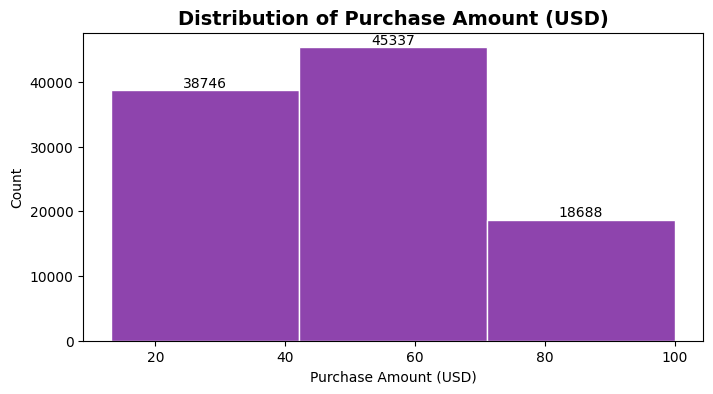

In [ ]:
# Histogram: distribution of purchase amount
plt.figure(figsize=(8, 4))
values, bins, bars = plt.hist(df['Purchase Amount (USD)'], edgecolor='white', color='#8E44AD', bins = 3)
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.title('Distribution of Purchase Amount (USD)', fontweight ='bold', fontsize = 14)
plt.bar_label(bars, fontsize=10)
plt.show()

The histogram shows that the distribution of purchase amount (USD) is mainly concentrated below 70 USD, with the biggest part of order values being around 40-70 USD per order.

Text(0.5, 1.0, 'Purchase Amount Spread')

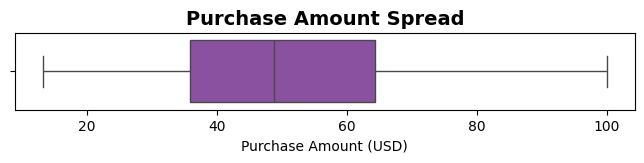

In [ ]:
# Boxplot: purchase amount spread
plt.figure(figsize=(8, 1))
sns.boxplot(
    x=df['Purchase Amount (USD)'],
    color='#8E44AD'
)
plt.title('Purchase Amount Spread', fontweight ='bold', fontsize = 14)

The boxplot indicates that the overall spread of purchase amount is diverse: it varies from below 20 USD up to 100 USD, with most values concentrated around 35-65 USD and median price around 50 USD.

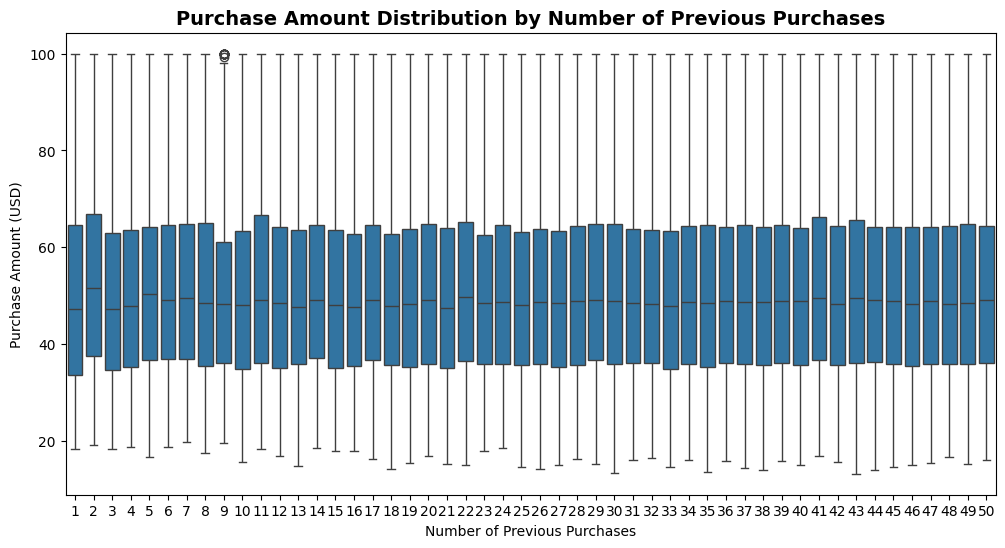

In [ ]:
# Boxplot: purchase amount distribution by number of previous purchases
plt.figure(figsize=(12,6))
sns.boxplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df)
plt.xlabel('Number of Previous Purchases', fontsize = 10)
plt.ylabel('Purchase Amount (USD)', fontsize = 10)
plt.title('Purchase Amount Distribution by Number of Previous Purchases', fontweight ='bold', fontsize = 14)
plt.show()

The box plot shows that the purchase amount does not change much in relationship to number of previous purchases. The median prices are mostly at the same level across all categories. Outliers are present only in one category.

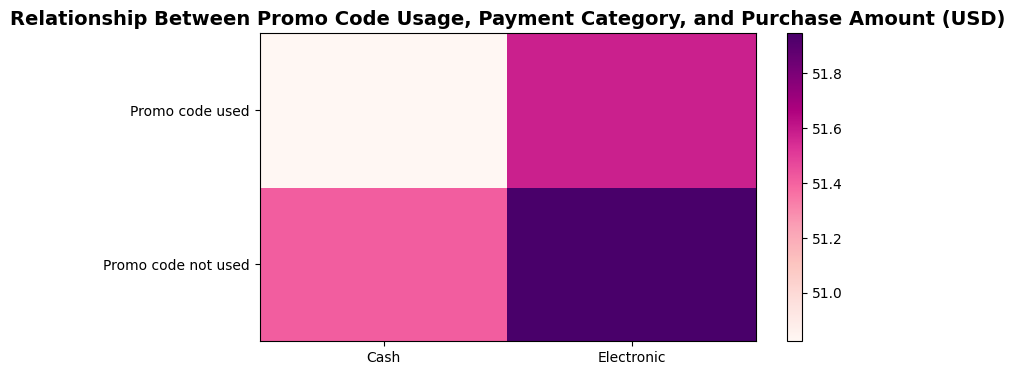

In [ ]:
# Grouping by Promo Code Used and Payment Category and calculating the average purchase amount
df_grouped_hm = df[['Promo Code Used','Payment Category', 'Purchase Amount (USD)']]
df_grouped_hm_table = df_grouped_hm.groupby(['Promo Code Used','Payment Category'],as_index=False).mean()

# Creating pivot table for the grouped result
grouped_pivot = df_grouped_hm_table.pivot(index='Promo Code Used',columns='Payment Category')
grouped_pivot = grouped_pivot.fillna(0) 

# Heatmap
fig, ax = plt.subplots(figsize =(8, 4))
im = ax.pcolor(grouped_pivot, cmap='RdPu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = ['Promo code not used', 'Promo code used']
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False, fontsize = 10)
ax.set_yticklabels(col_labels, minor=False, fontsize = 10)
plt.xticks(rotation=0)
ax.set_title('Relationship Between Promo Code Usage, Payment Category, and Purchase Amount (USD)', fontweight ='bold', fontsize = 14)
fig.colorbar(im)
plt.show()

The heatmap shows the average purchase amount distribution in relationship to Promo Code Usage and Payment Category suggesting overall trend that purchases made without promo code and paid with electronic payment method are slightly higher than the purchases with promo code and cash payment. 

Conclusions After Descriptive Statistical Analysis:
- The third quartile shows that most customers (75%) were aged 57 or younger.
- From 4 product categories and 8 unique products represented in the dataset, the most popular category was Clothing, and the product bought most often was sweater. 
- Although some orders were as low as 13 USD and others reached 100 USD, the average purchase amount was 51.88 USD. Most order values were within ±20.78 USD of the mean. 
- From 50 states represented in the dataset Illinois was the state with most orders. 
- Size "M" and color blue were chosen most often. 
- Most orders were placed on Saturday, season - summer.
- Although ratings varied from 1 to 5, most of them were generally positive (the mean: 3.85). The first quartile indicates that only 25% of ratings were below or equal to 3.
- From 8 different payment methods credit card dominated, and most customers selected standard shipping from 5 different shipping types.
- 25% of customers had more than 44 prior purchases, with average amount being 33. 
- Purchases without promo codes and paid in cash tended to be slightly higher on average.

<br>
<h3>Numeric-Numerical Analysis</h3>

In [ ]:
# Calculating the correlation between variables of type "int64" or "float64"
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr(method='pearson')

Customer ID   Age  Gender  Purchase Amount (USD)  \
Customer ID                   1.00  0.00    0.80                   0.00   
Age                           0.00  1.00   -0.01                   0.01   
Gender                        0.80 -0.01    1.00                   0.00   
Purchase Amount (USD)         0.00  0.01    0.00                   1.00   
Review Rating                 0.00  0.00    0.00                   0.01   
Subscription Status          -0.77  0.00   -0.42                   0.00   
Promo Code Used              -0.00  0.00   -0.00                  -0.01   
Previous Purchases           -0.03  0.03   -0.02                   0.00   
WeekdayNum                    0.00 -0.00    0.00                  -0.02   
Weekend                       0.01 -0.00    0.01                  -0.02   
Churn                        -0.00 -0.02   -0.00                  -0.03   
Latitude                      0.02 -0.00    0.00                   0.00   
Longitude                    -0.01  0.03   -0.01                  -0.00   

                       Review Rating  Subscription Status  Promo Code Used  \
Customer ID                     0.00                -0.77            -0.00   
Age                             0.00                 0.00             0.00   
Gender                          0.00                -0.42            -0.00   
Purchase Amount (USD)           0.01                 0.00            -0.01   
Review Rating                   1.00                -0.00            -0.00   
Subscription Status            -0.00                 1.00             0.00   
Promo Code Used                -0.00                 0.00             1.00   
Previous Purchases              0.00                 0.01             0.04   
WeekdayNum                      0.00                -0.01             0.00   
Weekend                         0.00                -0.01             0.00   
Churn                           0.00                 0.01            -0.00   
Latitude                       -0.00                -0.01            -0.00   
Longitude                      -0.00                 0.00            -0.00   

                       Previous Purchases  WeekdayNum  Weekend  Churn  \
Customer ID                         -0.03        0.00     0.01  -0.00   
Age                                  0.03       -0.00    -0.00  -0.02   
Gender                              -0.02        0.00     0.01  -0.00   
Purchase Amount (USD)                0.00       -0.02    -0.02  -0.03   
Review Rating                        0.00        0.00     0.00   0.00   
Subscription Status                  0.01       -0.01    -0.01   0.01   
Promo Code Used                      0.04        0.00     0.00  -0.00   
Previous Purchases                   1.00        0.01     0.01  -0.07   
WeekdayNum                           0.01        1.00     0.79  -0.00   
Weekend                              0.01        0.79     1.00  -0.00   
Churn                               -0.07       -0.00    -0.00   1.00   
Latitude                            -0.01       -0.00    -0.00   0.03   
Longitude                           -0.05        0.00     0.00  -0.01   

                       Latitude  Longitude  
Customer ID                0.02      -0.01  
Age                       -0.00       0.03  
Gender                     0.00      -0.01  
Purchase Amount (USD)      0.00      -0.00  
Review Rating             -0.00      -0.00  
Subscription Status       -0.01       0.00  
Promo Code Used           -0.00      -0.00  
Previous Purchases        -0.01      -0.05  
WeekdayNum                -0.00       0.00  
Weekend                   -0.00       0.00  
Churn                      0.03      -0.01  
Latitude                   1.00      -0.09  
Longitude                 -0.09       1.00

In [ ]:
# Function for evaluating Spearman's correlation coefficient and p-value
def spearmans_coef_p_val (spearman_c, p_val):
    if (spearman_c <= 1) & (spearman_c >= 0.9):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a very high positive correlation between both variables.")
    elif (spearman_c >= -1) & (spearman_c <= -0.9):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a very high negative correlation between both variables.")
    elif (spearman_c < 0.9) & (spearman_c >= 0.7):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a high positive correlation between both variables.")
    elif (spearman_c > -0.9) & (spearman_c <= -0.7):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a high negative correlation between both variables.")
    elif (spearman_c < 0.7) & (spearman_c >= 0.5):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a moderate positive correlation between both variables.")
    elif (spearman_c > -0.7) & (spearman_c <= -0.5):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a moderate negative correlation between both variables.")
    elif (spearman_c < 0.5) & (spearman_c >= 0.3):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a low positive correlation between both variables.")
    elif (spearman_c > -0.5) & (spearman_c <= -0.3):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a low negative correlation between both variables.")
    elif (spearman_c < 0.3) & (spearman_c >= 0):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a negligible correlation between both variables.")
    elif (spearman_c > -0.3) & (spearman_c < 0):
        print("Spearman's correlation coefficient is", spearman_c, ", so there is a negligible correlation between both variables.")

    if p_val < 0.05:
        print("The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.")
    else:
        print("The p-value >= 0.05, so we fail to reject the null hypothesis. There is no statistically significant monotonic relationship between both variables.")

In [ ]:
# Calculating Spearman's correlation coefficient and p-value for Gender/Subscription Status
spearman_coef, p_value = stats.spearmanr(df['Gender'], df['Subscription Status'])
print("Spearman's correlation coefficient for Gender/Subscription Status: ", spearman_coef, ", P-value = ", p_value)
spearmans_coef_p_val(spearman_coef, p_value)

Spearman's correlation coefficient for Gender/Subscription Status:  -0.4162160585153613 , P-value =  0.0
Spearman's correlation coefficient is > -0.3 ( -0.4162160585153613 ), so there is a low negative correlation between both variables.
The p-value < 0.05, so we can reject the null hypothesis. There is a statistically significant monotonic relationship between both variables.


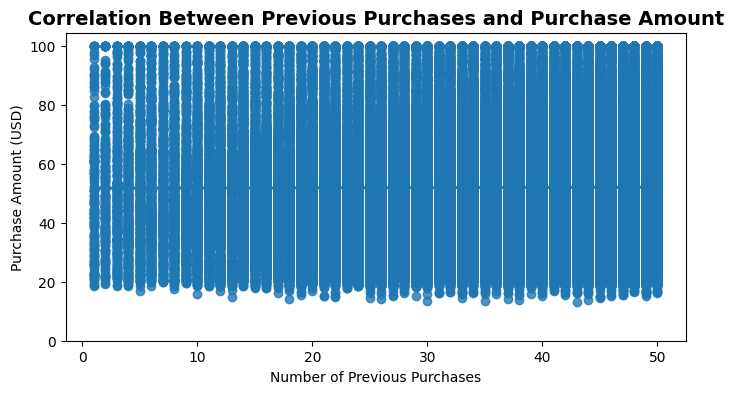

In [ ]:
# Scatterplot: correlation between purchase amount and number of previous purchases
plt.figure(figsize=(8,4))
sns.regplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df)
plt.ylim(0, None)
plt.xlabel('Number of Previous Purchases', fontsize = 10)
plt.ylabel('Purchase Amount (USD)', fontsize = 10)
plt.title('Correlation Between Previous Purchases and Purchase Amount', fontweight ='bold', fontsize = 14)
plt.show()

Spearman's correlation coefficient for Gender/Subscription Status is -0.42 indicating low negative correlation between both variables.
The p-value < 0.05 indicates a statistically significant monotonic relationship between both variables.<br>
Pearson's correlation coefficient for all the other numerical variables is between 0.3 and -0.3, suggesting a negligible correlation between these variables. The correlation coefficient 0.79 for Weekend and WeekdatNum is due to overlapping values.<br>
The scatterplot shows that there is no correlation between purchase amount and number of previous purchases.

<br>
<h3>Numeric-Categorical Analysis</h3>

<h5>Customer Behavior Report</h5>

- Number of Unique Customers per Year

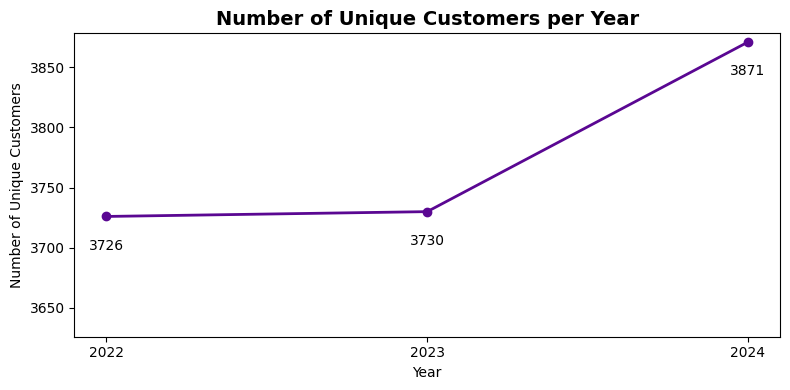

In [ ]:
# Number of unique customers per year 
unique_customers_per_year = (
    df.groupby('Year')['Customer ID']
      .nunique()  
)

# Converting to a DataFrame
unique_customers_per_year = unique_customers_per_year.reset_index()
unique_customers_per_year.columns = ['Year', 'Unique Customers']

# Line chart
plt.figure(figsize=(8, 4))
plt.plot(
    unique_customers_per_year['Year'],
    unique_customers_per_year['Unique Customers'],
    color="#5a0792",
    linewidth=2,
    marker='o'
)

plt.ylim(ymin=unique_customers_per_year['Unique Customers'].min() - 100)

# Labels and title
plt.xticks(unique_customers_per_year['Year'], rotation=0)
plt.xlabel('Year')
plt.ylabel('Number of Unique Customers')
plt.title('Number of Unique Customers per Year', weight='bold', fontsize=14)

# Annotations for each data point
for i, row in unique_customers_per_year.iterrows():
    plt.text(
        row['Year'],                       # X coordinate
        row['Unique Customers'] - 30,       # Y coordinate
        f"{int(row['Unique Customers'])}",  # Label text
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

The line chart suggests that the number of unique customers tend to increase, especially in 2024 (for 3.78%).

- Number of Total Vs Subscribed Customers

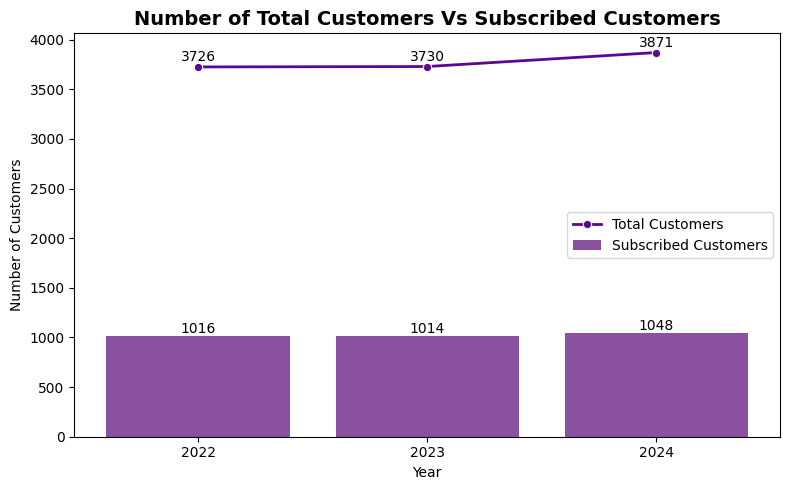

In [ ]:
# Total unique customers per year
total_customers = (
    df.groupby('Year')['Customer ID']
      .nunique()  
      .reset_index(name='Total Unique Customers')
)

# Unique subscribed customers per year
subscribed_customers = (
    df[df['Subscription Status'] == 1]
      .groupby('Year')['Customer ID']
      .nunique()
      .reset_index(name='Unique Subscribed Customers')
)

# Merging total unique customers and unique subscribed customers into one DataFrame
merged = pd.merge(total_customers, subscribed_customers, on='Year', how='left')
merged['Unique Subscribed Customers'] = merged['Unique Subscribed Customers'].fillna(0)

# Year as a category
merged['Year'] = merged['Year'].astype(str)

plt.figure(figsize=(8,5))

# Bar chart for subscribed customers
ax = sns.barplot(
    data=merged,
    x='Year',
    y='Unique Subscribed Customers',
    color='#8E44AD',
    label='Subscribed Customers'
)

# Line chart for total unique customers (same y-axis) 
sns.lineplot(
    data=merged,
    x='Year',
    y='Total Unique Customers',
    marker='o',
    color='#5a0792',
    linewidth=2,
    label='Total Customers'
)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.title('Number of Total Customers Vs Subscribed Customers', weight='bold', fontsize=14)
plt.legend()

# Value labels for line chart
for i, value in enumerate(merged['Total Unique Customers']):
    plt.text(
        i, value + 30, f'{int(value)}',
        ha='center', va='bottom'
    )

# Value labels for bar chart
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

In [ ]:
# Calculating the percentage of subscribed customers from total unique customers
percentage = merged['Unique Subscribed Customers'] / merged['Total Unique Customers'] * 100
print(percentage)

0   27.27
1   27.18
2   27.07
dtype: float64


The line and bar charts indicate that subscribed customers have a stable share of around 27% of total unique customers during 2022-2024.

- Customers by Age Group

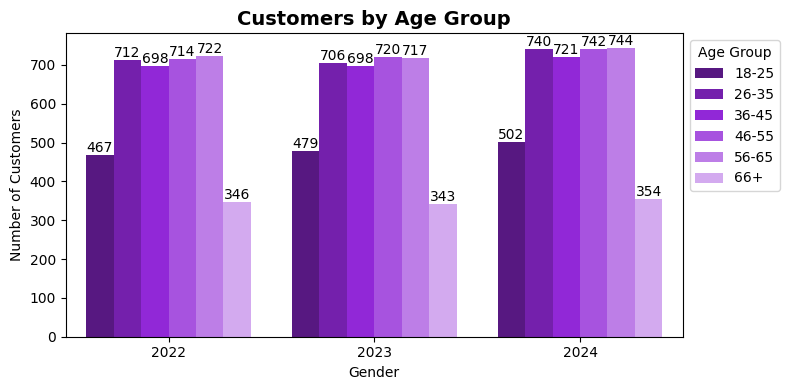

In [ ]:
# Unique customers by age group
grouped_age = (
    df.groupby(['Year', 'Age_Binned'])['Customer ID']
      .nunique()  
      .reset_index(name='Count')
)

palette = ["#5a0792", "#7909c3", "#970bf4", "#ac3cf6", "#c06df8", "#d59efa", "#eacffc"]

# Bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=grouped_age, x='Year', y='Count', hue='Age_Binned', palette=palette)

# Labels and title
plt.xticks(ticks=[0, 1, 2], labels=['2022', '2023', '2024'], rotation = 0)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customers by Age Group', weight='bold', fontsize=14)
plt.legend(title='Age Group')

# Show value labels
for container in ax.containers:
    ax.bar_label(container)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The bar chart indicates that the majority of customers are between the age of 26 and 65 which is the most economically active age group.

- Subscription Status by Gender

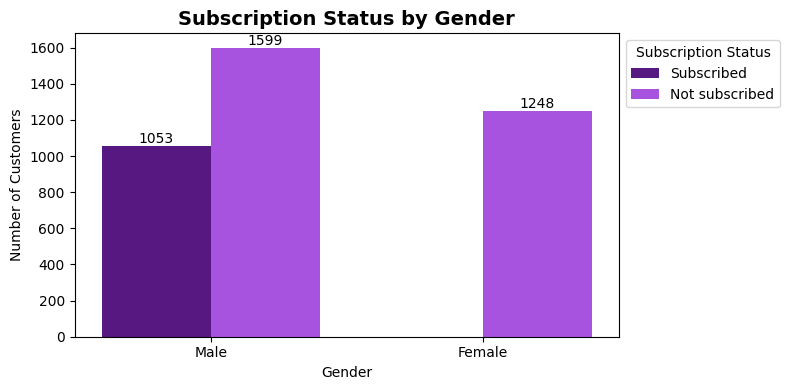

In [ ]:
# Subscription status by gender
subscript_gender = (
    df.groupby(['Gender', 'Subscription Status'])['Customer ID']
      .nunique()  
      .reset_index(name='Count')
)

palette = ["#5a0792", "#ac3cf6"]

# Bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=subscript_gender, x='Gender', y='Count', hue='Subscription Status', hue_order=[1, 0], palette=palette)

# Labels and title
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation = 0)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Subscription Status by Gender', weight='bold', fontsize=14)

# Legend labels
new_labels = ['Subscribed', 'Not subscribed']
for t, l in zip(ax.legend_.texts, new_labels):
    t.set_text(l)

# Value labels
for container in ax.containers:
    ax.bar_label(container)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Men are the biggest part of the total unique customers (68%), and they are also more prone to subscription. The bar chart shows that there are no subscribed female customers in this dataset while 27% men have subscribed.  

- Average Purchase per Customer

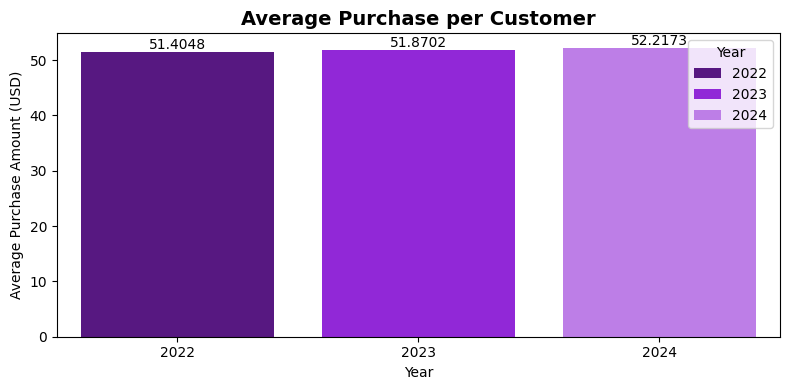

In [ ]:
# Average purchase per customer (per order)
grouped_df_avr_purchase = df.groupby('Year')['Purchase Amount (USD)'].mean().reset_index()
palette = ["#5a0792", "#970bf4", "#c06df8"]

# Bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=grouped_df_avr_purchase, x='Year', y='Purchase Amount (USD)', hue='Year', palette=palette)

# Labels
plt.xticks(ticks=[0, 1, 2], labels=['2022', '2023', '2024'], rotation = 0)
plt.xlabel('Year')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase per Customer', weight='bold', fontsize=14)

# Value labels
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

The bar chart shows that the average purchase per customer has been stable during 2022-2024, around 51-52 USD per order.

- Average Customer Spending (USD) by Weekday

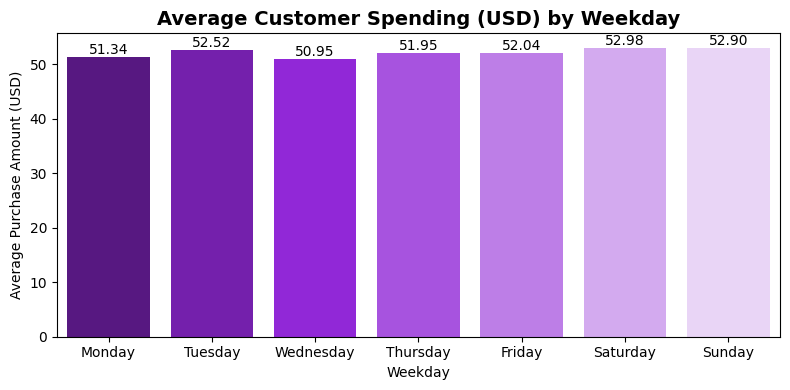

In [ ]:
# Average customer spending by weekday
grouped_df_weekday = (
    df.groupby('Weekday', as_index=False)['Purchase Amount (USD)']
      .mean()
      .sort_values('Weekday')
)

palette = ["#5a0792", "#7909c3", "#970bf4", "#ac3cf6", "#c06df8", "#d59efa", "#eacffc"]

# Bar plot
plt.figure(figsize=(8,4))
ax = sns.barplot(
    data=grouped_df_weekday,
    x='Weekday',
    y='Purchase Amount (USD)',
    palette=palette
)

# Labels and title
plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5, 6],
    labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.xlabel('Weekday')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Customer Spending (USD) by Weekday', weight='bold', fontsize=14)

# Value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

The bar plot indicates that the customer purchasing habits are stable during week - the average purchase amount changes insignificantly. 

- Promo Code Usage (Ever Used vs Never Used)

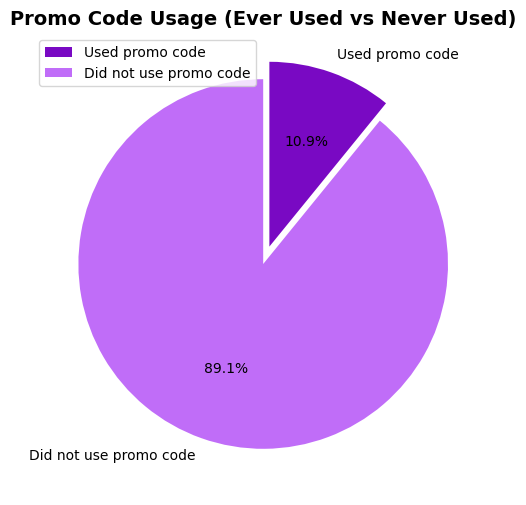

In [ ]:
# Promo code usage - ever used vs never used
# Collapsing the data to one record per customer
customer_summary = (
    df.groupby('Customer ID') 
      .agg({
          'Promo Code Used': 'max'        
      })
      .reset_index() 
)

# Grouping the data
grouped_df_promo = (
    customer_summary.groupby('Promo Code Used')
                    .size()
                    .reset_index(name='Count')
)

palette = ["#7909c3", "#c06df8"]
labels = 'Used promo code', 'Did not use promo code'
explode = (0.1, 0)

# Pie chart
plt.figure(figsize=(8,6))
plt.pie(
    grouped_df_promo['Count'],  
    labels=labels,
    autopct='%1.1f%%',  
    startangle=90,      
    counterclock=False,  
    explode=explode,
    colors=palette
)
plt.legend()
plt.title('Promo Code Usage (Ever Used vs Never Used)', weight='bold', fontsize=14)
plt.show()

The pie chart shows that only 10.9% of total unique customers used a promo code. 

- Promo Code Usage by Subscribed vs. Non-Subscribed Customers

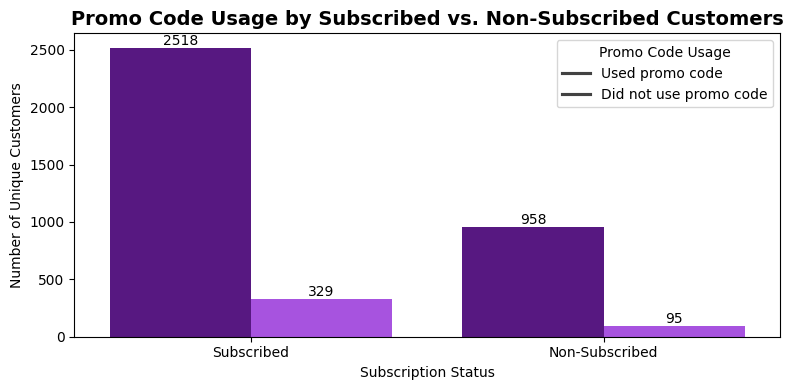

In [ ]:
# Promo code usage by subscribed vs. non-subscribed customers
# Collapsing the data to one record per customer
customer_summary = (
    df.groupby('Customer ID')
      .agg({
          'Subscription Status': 'max',   
          'Promo Code Used': 'max'        
      })
      .reset_index()
)

# Grouping the data
grouped_df_promo = (
    customer_summary.groupby(['Subscription Status', 'Promo Code Used'])
                    .size()
                    .reset_index(name='Count')
)

palette = ["#5a0792", "#ac3cf6"]

# Bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=grouped_df_promo,
    x='Subscription Status',
    y='Count',
    hue='Promo Code Used',  
    hue_order=[1, 0],
    palette=palette
)

# Labels and title
plt.xticks(ticks=[0, 1], labels=['Subscribed', 'Non-Subscribed'])
plt.xlabel('Subscription Status')
plt.ylabel('Number of Unique Customers')
plt.title('Promo Code Usage by Subscribed vs. Non-Subscribed Customers', weight='bold', fontsize=14)
plt.legend(title='Promo Code Usage', loc='upper right', labels=['Used promo code', 'Did not use promo code'])

# Value labels
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

The bar chart shows that 11.55% of total subscribed customers used promo while the usage of promo code between non-subscribed customers is slightly lower: 9.02%.

- Customer Preferred Payment Methods

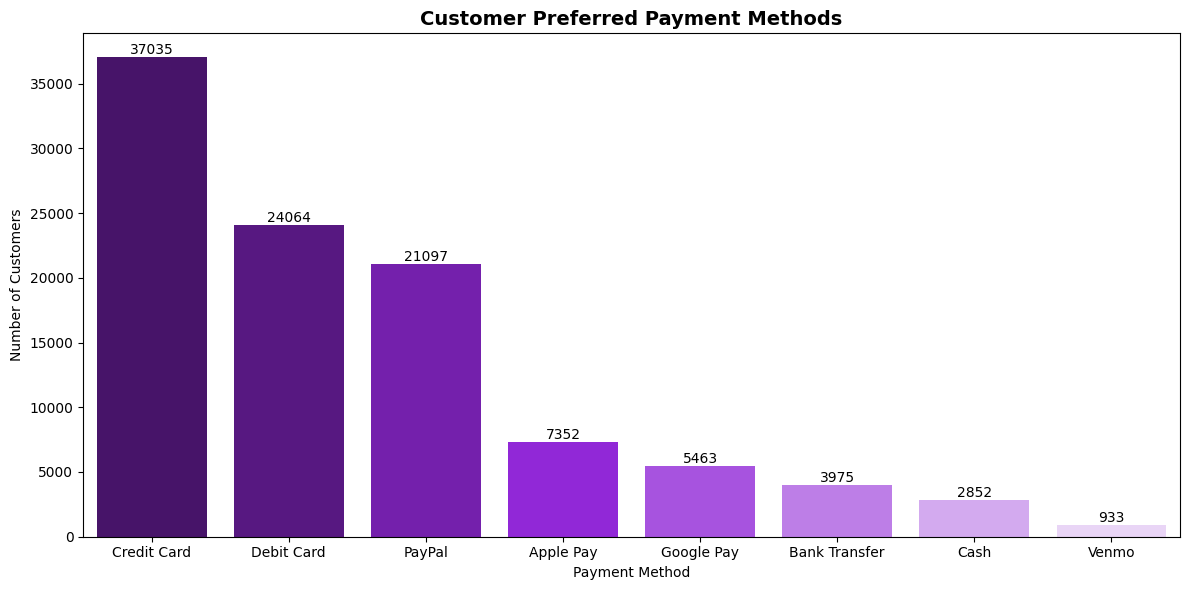

In [ ]:
# Customer preferred payment method (per order)
payment_method = (
    df.groupby('Payment Method')
      .size()
      .reset_index(name='Count')
)

payment_method_sorted = payment_method.sort_values(
    by='Count', ascending=False
)

palette = ["#4a0677","#5a0792", "#7909c3", "#970bf4", "#ac3cf6", "#c06df8", "#d59efa", "#eacffc"]

# Bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=payment_method_sorted,
    x='Payment Method',
    y='Count',
    hue='Payment Method',  
    palette=palette
)

# Labels and title
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.title('Customer Preferred Payment Methods', weight='bold', fontsize=14)

# Value labels
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

The bar and pie charts show that customers prefer all kinds of electronic payments instead of cash.

- Number of Returning vs New Customers

In [ ]:
df['Previous Purchases'].value_counts().loc[lambda x : x<1]

Series([], Name: count, dtype: int64)

All the customers are returning customers with prioe orders.

- Customer Review Rates Distribution

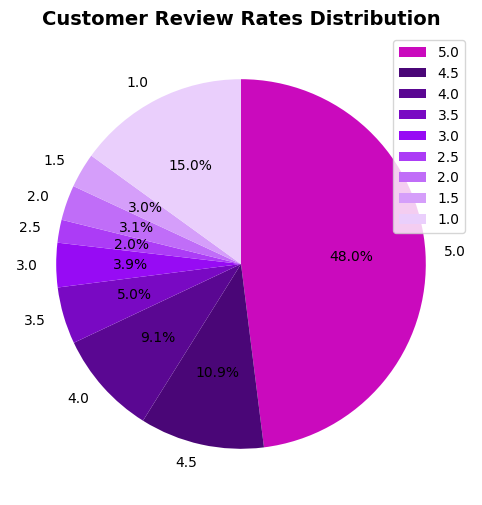

In [ ]:
# Customer review rates distribution 
review_counts = pd.DataFrame({
    'Review Rate': [5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1],
    'Count': [49347, 11181, 9346, 5117, 3983, 2059, 3159, 3133, 15446]
})
review_counts_sorted = review_counts.sort_values('Review Rate', ascending=False)

palette = ["#CA0ABD", "#4a0677","#5a0792", "#7909c3", "#970bf4", "#ac3cf6", "#c06df8", "#d59efa", "#eacffc"]

plt.figure(figsize=(8,6))
plt.pie(
    review_counts_sorted['Count'],  
    labels=review_counts_sorted['Review Rate'],  
    autopct='%1.1f%%',  
    startangle=90,      
    counterclock=False,  
    colors=palette
)
plt.legend()
plt.title('Customer Review Rates Distribution', weight='bold', fontsize=14)

plt.show()

The pie charts indicates that the majority of customer reviews are positive: 68% have given the rate 4 or more while 23.1% of customers have rated the company or its products negatively (rate below 3).

- Customer Location

In [ ]:
# Unique customers by location
location_unique = (
    df.groupby(['Location', 'Latitude', 'Longitude'])['Customer ID']
      .nunique()
      .reset_index(name='Unique Customers')
)

# Geo scatter plot
fig = px.scatter_geo(
    data_frame=location_unique,
    lat='Latitude',
    lon='Longitude',
    size='Unique Customers',
    hover_name='Location',
    color='Unique Customers',
    projection='natural earth',
)

fig.update_traces(marker=dict(opacity=0.7))
fig.update_geos(scope='usa', projection_type='albers usa')
fig.update_layout(title={
        'text': 'Customer Distribution by Location',
        'x': 0.5,                
        'xanchor': 'center',
        'y': 0.9,                
        'yanchor': 'top'},
        title_font=dict(size=18, weight='bold'))

fig.show()


The chart shows the the most unique customers come Montana (96), California (95), Idaho (93) and Illinois (92) while the states with the least customers are Rhode Island (63), Kansas (63), Hawaii (65) and Arizona (65).

<br>
<h5>Sales Report</h5>

- Total Sales per Year

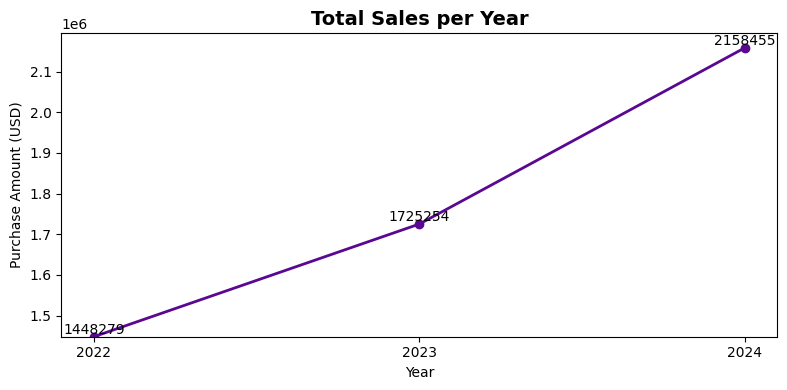

In [ ]:
# Total sales per year 
total_sales_year = df.groupby('Year', as_index=False)['Purchase Amount (USD)'].sum().reset_index()

# Line chart
plt.figure(figsize=(8, 4))
plt.plot(
    total_sales_year['Year'],
    total_sales_year['Purchase Amount (USD)'],
    color="#5a0792",
    linewidth=2,
    marker='o'
)

plt.ylim(ymin=total_sales_year['Purchase Amount (USD)'].min() - 100)

# Labels and title
plt.xticks(total_sales_year['Year'], rotation=0)
plt.xlabel('Year')
plt.ylabel('Purchase Amount (USD)')
plt.title('Total Sales per Year', weight='bold', fontsize=14)

# Annotations for each data point
for i, row in total_sales_year.iterrows():
    plt.text(
        row['Year'],                       # X coordinate
        row['Purchase Amount (USD)'] - 30,       # Y coordinate
        f"{int(row['Purchase Amount (USD)'])}",  # Label text
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

The line chart shows that total sales increase every year, especially in 2024.

<h4>Total Sales by Season and Year</h4>

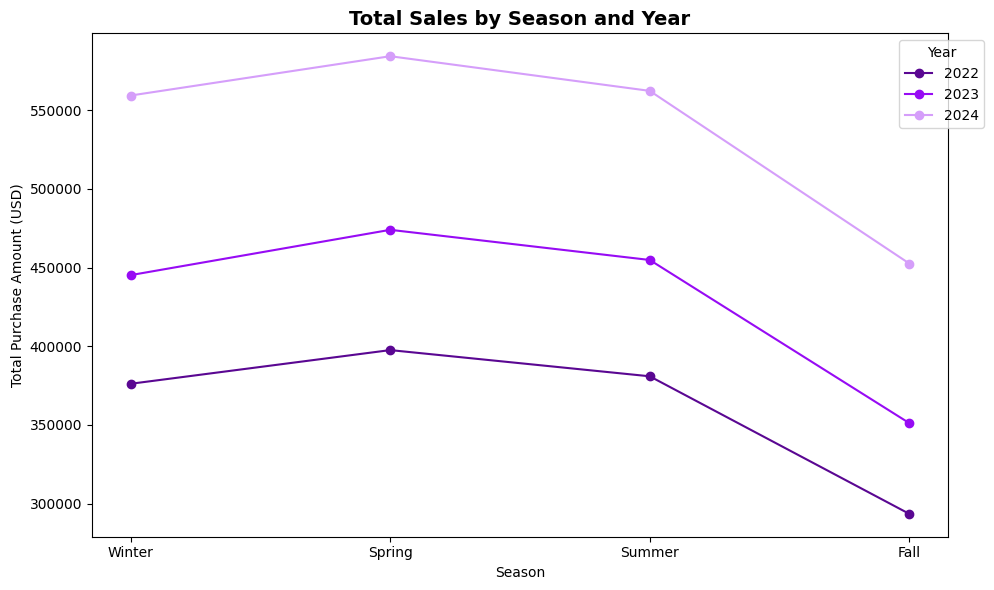

In [ ]:
# Total sales by season and year
sales_season = df.groupby(['Year', 'Season'], as_index=False)['Purchase Amount (USD)'].sum()

season_order = ['Winter', 'Spring', 'Summer', 'Fall']
sales_season['Season'] = pd.Categorical(sales_season['Season'], categories=season_order, ordered=True)
sales_season = sales_season.sort_values(['Year', 'Season'])

colors = ['#5a0792', '#970bf4', '#d59efa']

# Line plot
plt.figure(figsize=(10, 6))

# Looping over each year and plotting its seasonal sales
for year, color in zip(sales_season['Year'].unique(), colors):
    data = sales_season[sales_season['Year'] == year]
    plt.plot(
        data['Season'], 
        data['Purchase Amount (USD)'],
        marker='o',
        label=year,
        color=color
    )

# Labels and title
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Sales by Season and Year', weight='bold', fontsize=14)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper right')

plt.tight_layout()
plt.show()

The line chart indicates seasonality in sales: the highest sales are in summer, and the lowest - in fall.

<h4>Total Sales By Month</h4>

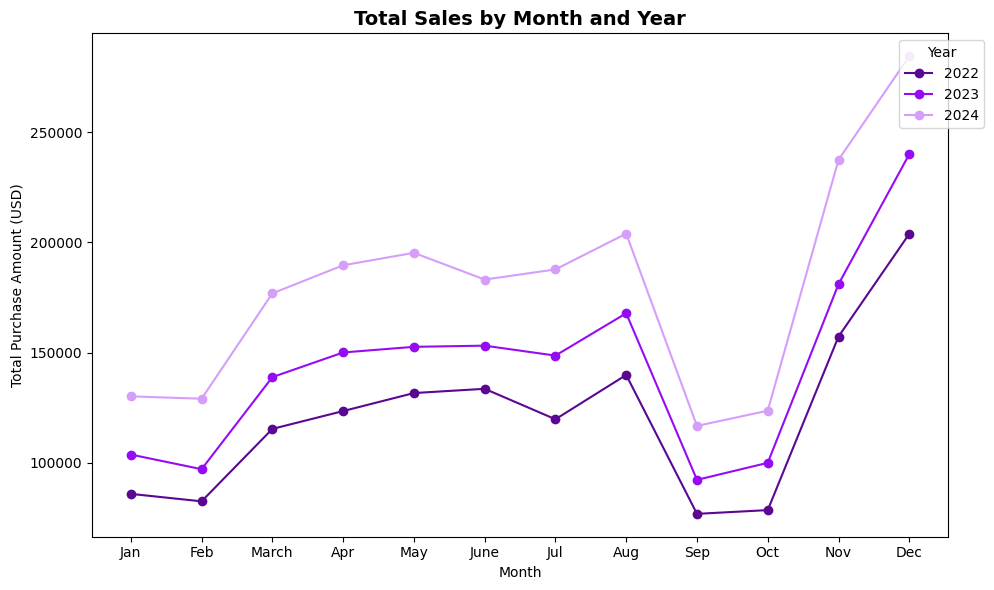

In [ ]:
# Total sales by month and year
sales_month = df.groupby(['Year', 'Month'], as_index=False)['Purchase Amount (USD)'].sum()

colors = ['#5a0792', '#970bf4', '#d59efa']

# Line plot
plt.figure(figsize=(10, 6))

# Looping through years and colors
for year, color in zip(sales_month['Year'].unique(), colors):
    data = sales_month[sales_month['Year'] == year]
    plt.plot(
        data['Month'], 
        data['Purchase Amount (USD)'],
        marker='o',
        label=year,
        color=color
    )

# Labels and title
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Jan', 'Feb', 'March', \
                'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 0)
plt.title('Total Sales by Month and Year', weight='bold', fontsize=14)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper right')

plt.tight_layout()
plt.show()

The line chart shows that despite the seasonal sales peak in summer and the seasonal lowest point in fall, the highest sales during year are in December. 

- Average Total Daily Sales per Weekday

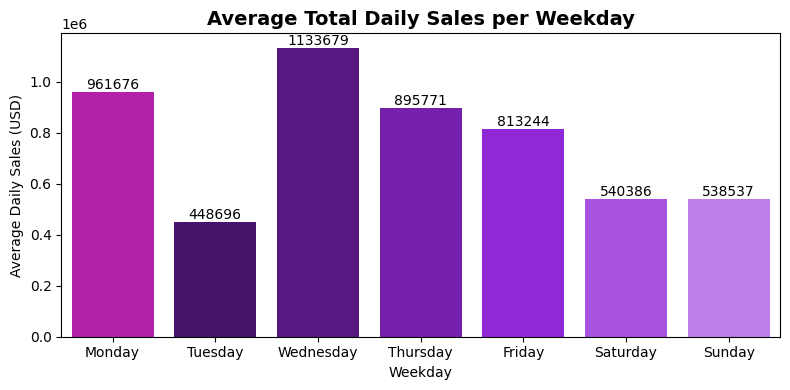

In [ ]:
# Total daily sales
daily_sales = df.groupby('Weekday', as_index=False)['Purchase Amount (USD)'].sum()

# Average total sales per weekday
grouped_df_weekday = (
    daily_sales.groupby('Weekday', as_index=False)['Purchase Amount (USD)']
               .mean()
)

# Bar plot
plt.figure(figsize=(8,4))
ax = sns.barplot(
    data=grouped_df_weekday,
    x='Weekday',
    y='Purchase Amount (USD)',
    palette=palette
)

# Labels and title
plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5, 6],
    labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.xlabel('Weekday')
plt.ylabel('Average Daily Sales (USD)')
plt.title('Average Total Daily Sales per Weekday', weight='bold', fontsize=14)

# Value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

Wednesday generates the most total sales overall during 2022-2044, while Tuesday is the day with the lowest average sales.

- Average Order Amount by Year

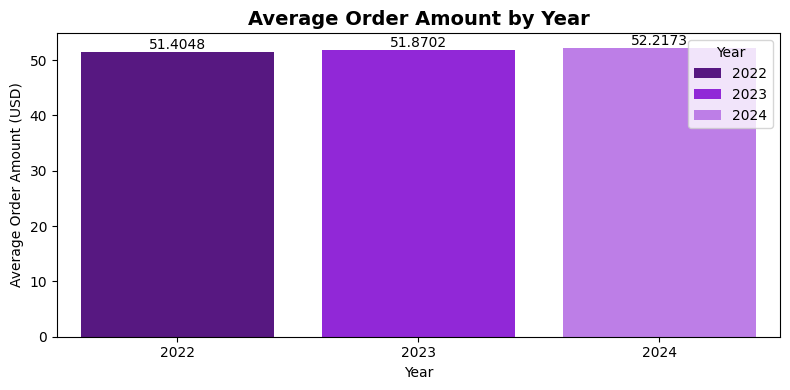

In [ ]:
# Average order amount by year
grouped_df_avr_purchase = df.groupby('Year')['Purchase Amount (USD)'].mean().reset_index()
palette = ["#5a0792", "#970bf4", "#c06df8"]

# Bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=grouped_df_avr_purchase, x='Year', y='Purchase Amount (USD)', hue='Year', palette=palette)

# Labels and title
plt.xticks(ticks=[0, 1, 2], labels=['2022', '2023', '2024'], rotation = 0)
plt.xlabel('Year')
plt.ylabel('Average Order Amount (USD)')
plt.title('Average Order Amount by Year', weight='bold', fontsize=14)

# Value labels
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

During 2022-2024 the average order amount has been stable with a trend to slightly increase.

- 3 Best Selling States by Year

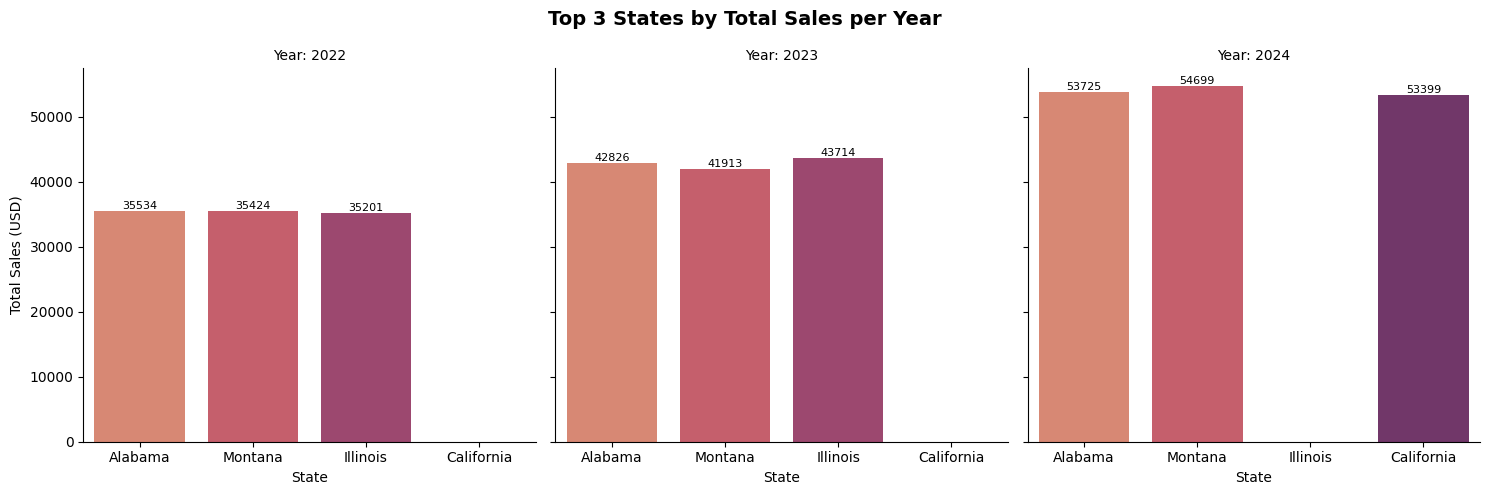

In [ ]:
# 3 best selling states by year
sales_state = df.groupby(['Year', 'Location'], as_index=False)['Purchase Amount (USD)'].sum()

sales_state_sorted = sales_state.sort_values(
    by=['Year', 'Purchase Amount (USD)'],
    ascending=[True, False]
)

top3_states_per_year = (
    sales_state_sorted.groupby('Year').head(3)
)

# Facet chart (small multiples)
g = sns.catplot(
    data=top3_states_per_year,
    x='Location', 
    y='Purchase Amount (USD)',
    col='Year',
    kind='bar',
    col_wrap=3, 
    sharey=True,  # the same y-axis
    palette='flare'
)

# Labels and titles
g.figure.subplots_adjust(top=0.85)
g.figure.suptitle('Top 3 States by Total Sales per Year', weight='bold', fontsize=14)
g.set_titles("Year: {col_name}")
g.set_axis_labels("State", "Total Sales (USD)")

# Value labels
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', fontsize=8)

plt.tight_layout()
plt.show()

The facet chart shows that Alabama and Montana have been between top 3 best selling states during 2022-2024 while sales in Illinois have decreased in 2024 leaving place in top 3 for California. 

- 3 States with Lowest Total Sales by Year

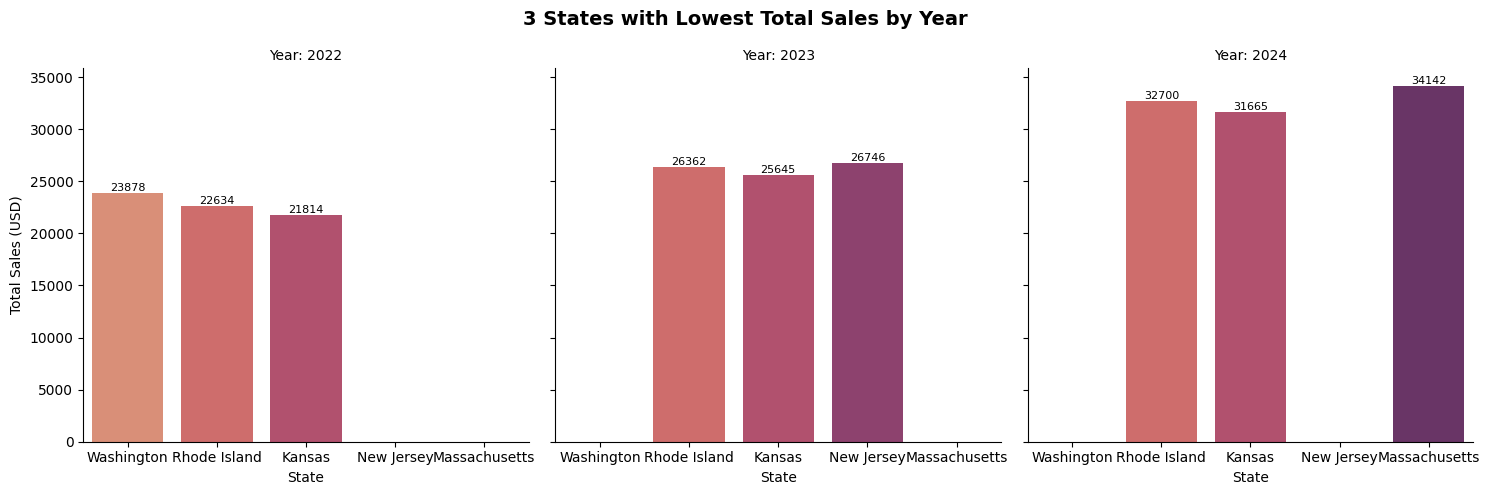

In [ ]:
# 3 states with lowest total sales by year
lowest3_states_per_year = (
    sales_state_sorted.groupby('Year').tail(3)
)

# Facet chart (small multiples)
g = sns.catplot(
    data=lowest3_states_per_year,
    x='Location', 
    y='Purchase Amount (USD)',
    col='Year',
    kind='bar',
    col_wrap=3, 
    sharey=True,  # the same y-axis
    palette='flare'
)

# Labels and titles
g.figure.subplots_adjust(top=0.85)
g.figure.suptitle('3 States with Lowest Total Sales by Year', weight='bold', fontsize=14)
g.set_titles("Year: {col_name}")
g.set_axis_labels("State", "Total Sales (USD)")

# Value labels
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', fontsize=8)

plt.tight_layout()
plt.show()

The facet chart shows that Kansas State and Rhode Island State have kept the position as the states with the lowest total sales for the last 3 years.

- Average Order Amount by State

In [ ]:
# Loading US states GeoJSON
url = "https://r2.datahub.io/clt98p6iw000fjm08obqajter/main/raw/data/admin1-us.geojson"
response = requests.get(url) 

# Saving the geojson locally:
with open('admin1-us.json', mode='wb') as file:
    file.write(response.content)

geojson_file = 'admin1-us.json'

# Choropleth plot
fig = px.choropleth(
    df,
    geojson=geojson_file,
    locations='Location',  # state name
    featureidkey='properties.name',  # key in the geojson
    color='Purchase Amount (USD)',
    color_continuous_scale='Agsunset'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title={
    'text': 'Average Order Amount by State', 
    'x': 0.5, 
    'xanchor': 'center',
    'yanchor': 'top'}, 
    title_font=dict(size=18, weight='bold'))

fig.show()

The choropleth plot shows that the states with the highest average order amount (100 USD) are Arkansas, Illinois, Nevada and Texas, while the states with the lowest average purchase are Rhode Island (19.7 USD) and Montana (20.7 USD).

- Promo Code Usage per Order

   Promo Code Used  Count
0                0  89213
1                1  13558


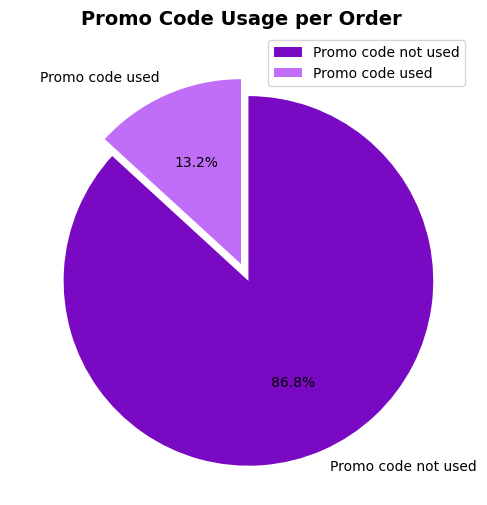

In [ ]:
# Promo code usage per order
grouped_df_promo = df.groupby('Promo Code Used').size().reset_index(name='Count')
print(grouped_df_promo)

palette = ["#7909c3", "#c06df8"]
labels = 'Promo code not used', 'Promo code used'
explode = (0.1, 0)

# Pie chart
plt.figure(figsize=(8,6))
plt.pie(
    grouped_df_promo['Count'],  
    labels=labels,
    autopct='%1.1f%%',  
    startangle=90,      
    counterclock=False,  
    explode=explode,
    colors=palette
)
plt.legend()
plt.title('Promo Code Usage per Order', weight='bold', fontsize=14)

plt.show()

The pie chart shows that promo code has been used for 13.2% of total orders during 2022-2024.

- Products and Their Categories in 2024

In [ ]:
# Products and their categories in 2024
top_products_2024 = df.groupby(['Category', 'Item Purchased'], as_index=False)['Purchase Amount (USD)'].sum()
top_products_2024_sorted = top_products_2024.sort_values(
    by=['Category', 'Item Purchased'],
    ascending=[True, False]
)

# Sunburst plot
fig = px.sunburst(
    top_products_2024_sorted,
    path=['Category', 'Item Purchased'],   
    values='Purchase Amount (USD)'
)

fig.update_layout(title={
    'text': 'Products and Their Categories in 2024', 
    'x': 0.5, 
    'xanchor': 'center',
    'y': 0.95, 
    'yanchor': 'top'}, 
    title_font=dict(size=18, weight='bold'))

fig.show()

It is visible from the sunburst plot plot that the best selling product category in 2024 was Clothing with such items like sweater (total sales: 2,289,417.80 USD) and blouse (1,301,722.90 USD), while the category that brought the least revenue was Outerwear with such items like coat (total sales: 148,172.40 USD) and jacket (220,463.70 USD).

<h4>Customer Churn by Year</h4>

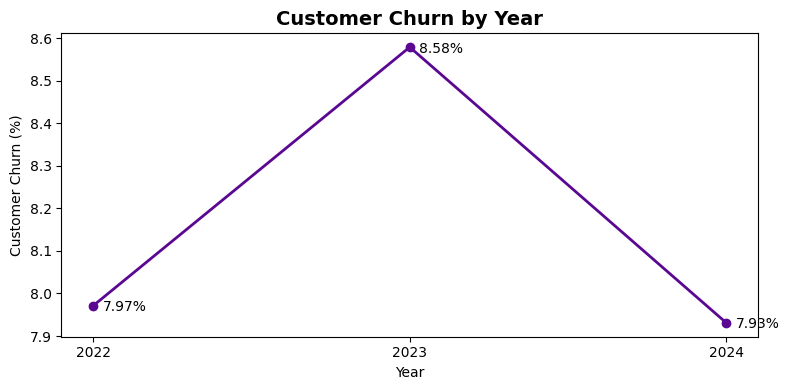

In [ ]:
# Total unique customers by year
unique_customers_per_year = (
    df.groupby('Year')['Customer ID']
      .nunique() 
      .reset_index(name='Count') 
)

# Churned unique customers by year
churned_customers_per_year = (
    df.groupby(['Year', 'Churn'])['Customer ID']
      .nunique()
      .reset_index(name='Count')
)

# Pivotting the data
churn_pivot = churned_customers_per_year.pivot(
    index='Year', columns='Churn', values='Count'
).fillna(0)

# Renaming the columns
churn_pivot.columns = ['Retained Customers', 'Churned Customers']

# Calculating the curn rate
churn_pivot['Total Customers'] = churn_pivot.sum(axis=1)
churn_pivot['Churn Rate (%)'] = (
    churn_pivot['Churned Customers'] / churn_pivot['Total Customers'] * 100
)

# Line plot
fig, ax = plt.subplots(figsize=(8, 4))  
ax.plot(
    churn_pivot.index,
    churn_pivot['Churn Rate (%)'],
    color="#5a0792",
    linewidth=2,
    marker='o'
)

# Labels and title
ax.set_xticks(churn_pivot.index)
ax.set_xlabel('Year')
ax.set_ylabel('Customer Churn (%)')
ax.set_title('Customer Churn by Year', weight='bold', fontsize=14)

# Labels for each data point
for x, y in zip(churn_pivot.index, churn_pivot['Churn Rate (%)']):
    ax.text(
        x + 0.1, y - 0.02, f"{y:.2f}%", 
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

The line chart shows that during 2022-2024 the customer churn has changed minimally with slight increase for 0.61% in 2023.

- Cash Vs Electronic Payment Methods

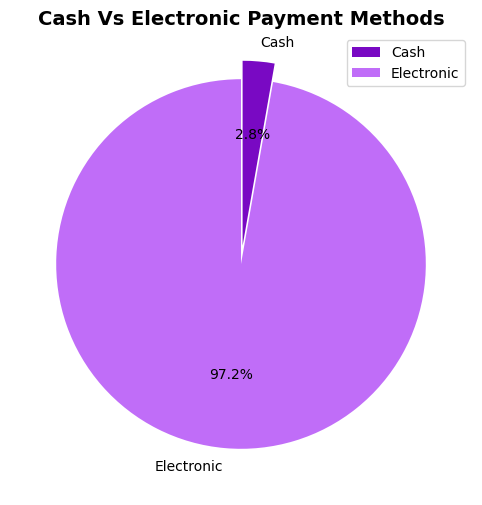

In [ ]:
# Cash vs electronic payment methods
payment_category = (
    df.groupby('Payment Category')
      .size()
      .reset_index(name='Count')
)

palette = ["#7909c3", "#c06df8"]
labels = 'Cash', 'Electronic'
explode = (0.1, 0)

# Pie chart
plt.figure(figsize=(8,6))
plt.pie(
    payment_category['Count'],  
    labels=labels,
    autopct='%1.1f%%',  
    startangle=90,      
    counterclock=False,  
    explode=explode,
    colors=palette
)
plt.legend()
plt.title('Cash Vs Electronic Payment Methods', weight='bold', fontsize=14)

plt.show()

The pie charts shows that 97.2% of orders have been paid using electronic payment methods instead of cash money (only 2.8%).

<br>
<h3>Conclusions After Exploratory Data Analysis</h3>

Customer Behavior:
- The number of unique customers increased slightly from 3,722 in 2022 to 3,871 in 2024.
- Subscribed customers consistently were around 27% of the total customers.
- Men represented 68% of all customers and were the only ones with subscriptions in this dataset.
- Most customers (75%) were aged 57 or younger, reflecting a primarily economically active customer base.
- Purchasing patterns remained stable: the average order value was around 52 USD, with insignificant variation across the weekdays.
- All customers were returning clients with aproximately 33 prior purchases, which indicatwa strong customer loyalty.
- Electronic payments dominated (97% of all transactions), especially by credit card, and most customers chose standard shipping.
- Only 10.9% of customers used promo codes, and purchases without codes tended to be slightly higher on average.
- Customer ratings were generally positive: 68% rated 4 or higher, while 23% gave a rating below 3.
- The most part of customers were located in Montana, California, Idaho, and Illinois; the fewest - in Rhode Island and Kansas.

Sales:
- Total sales increased from 1,448,279 USD in 2022 to 2,158,455 USD in 2024.
- Average order amount remained stable around 52 USD, with most purchase amounts being between 30 and 70 USD.
- Seasonality significantly affected sales surging in summer and dropping in fall. However, the highest peak in sales were in December due to holidays.
- Although most of the orders were placed on Saturday, Wednesday generated the highest total sales, but Tuesday - the lowest.
- Promo code were used for 13.2% of total orders.
- Customer churn changed minimally with slight increase for 0.61% in 2023.
- The best selling products in 2024 were sweater and blouse from Clothing category, while coat and jacket from Outerwear category accounted for the lowest sales. The most preferred size was "M", color - blue.
- Alabama and Montana were between top 3 best selling states during 2022-2024 while sales in Illinois have decreased in 2024 leaving place for California. 
- Kansas and Rhode Island have kept the position as the states with the lowest total sales for the last 3 years. 
- The states with the highest average order amount (100 USD) were Arkansas, Illinois, Nevada and Texas; the states with the lowest - Rhode Island (19.7 USD) and Montana (20.7 USD).

<br>
<h3>STRATEGIC INSIGHTS</h3>

Customer Behavior

- The number of customers is growing steadily but slowly, suggesting a stable market. Future growth may require expanding to new regions or demographic groups.
- Subscribed customers consistently representing around 27% of the total means that subscription has plateaued, indicating the need for new loyalty or subscription campaigns to attract new subscribers.
- Men being 68% of all customers and the only ones with subscriptions indicate that marketing and subscription strategies may be more oriented to this demographic group. Marketing and communication campaigns with women in mind could help reaching women as a segment.  
- Since company's customer base primarily is economically active group aged 57 or younger, there is a potential to develop products for active and young people and use digital campaigns as communication channel.
- Stable customer purchasing habits (average order value and weekday patterns) indicate a stable revenue but growth might be limited. Promo campaigns could help improve sales in days with lower sales. 
- The high customer loyalty (All customers were returning clients with average of 33 prior purchases) means that retention strategies are working well, however, incentives for future growth should be considered.
- The low usage of promo codes and slightly higher average purchases without promo codes suggest that other factors (e.g., brand, quality etc.) might play a more important role than discounts.
- Although customer satisfaction is quite high, the 23% of rates below 3 indicate that there is still room for improvement to increase customer satisfaction. 
- Expanding distribution and marketing in low-performing states could increase customer base, sales and market growth. 
 
  
<br>	
Sales Performance

- A trend of consistent sales growth (from 1.45M in 2022 to 2.16M in 202) is a very positive indicator although most likely it comes from loyal customer retention rather than new customers therefore marketing activities are necessary.
- The stable purchasing behavior (average order amount around 52 USD) might indicate price sensitivity, suggesting that increase of price could cause customer churn.
- Promotional campaigns could help with seasonality (drop in fall) increasing demand. 
- Higher category (premium) products could be promoted during the middle of the week since Wednesday had highest total sales compared to Saturday - the day with the most orders. 
- Although customer churn has not increased in 2024, marketing activities and after sales support could improve customer retention.
- Clothing category brings the biggest revenue therefore the main focus should be on this category while Outerwear category (the lowest revenue) should be examined further to detect problems.
- Sales decline for Illinois state leaving the top 3 of the best selling markets might indicate difficulties in this region (e.g., increase in competition). Kansas and Rhode Island remaining consistently as the lowest-performing states implies limited market penetration or demand in these areas. 
- Large variety of the average order value across states suggest that some states attract economically better situated buyers while customers in low-performing states may be more price-oriented and could benefit from promotions.

<br>
<br>
<br>

<a href="https://www.freepik.com/free-photo/high-technology-digital-graph-presentation-by-businesswoman_12193207.htm#fromView=search&page=1&position=2&uuid=e1c412a2-afa5-4f3a-bb87-98bab717fb92&query=High+technology+digital+graph+presentation+by+a+businesswoman">Image "High technology digital graph presentation by a businesswoman" by rawpixel.com on Freepik</a>